<a href="https://colab.research.google.com/github/brunoprp/neural-network-apresentation/blob/master/CNN_apresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image
Image(url= "https://i0.wp.com/deeplearningbook.com.br/wp-content/uploads/2019/06/dogs_cats.gif?resize=1170%2C658", width=800, height=350)

*    Classificão de imagens de Gatos e Cães
*    Rede Neural Convolucional (CNN)
  *    Tensorflow 2.0 : https://www.tensorflow.org/
  *    Site da base de dados: https://www.kaggle.com/c/dogs-vs-cats
* Artigos
  * http://www.scitepress.org/DigitalLibrary/Link.aspx?doi=10.5220/0007404301120119
  * http://openaccess.thecvf.com/content_cvpr_2018/html/Zhang_ShuffleNet_An_Extremely_CVPR_2018_paper.html
  * https://ieeexplore.ieee.org/abstract/document/7949028
  * Google Colab: https://research.google.com/colaboratory/faq.html#idle-timeouts




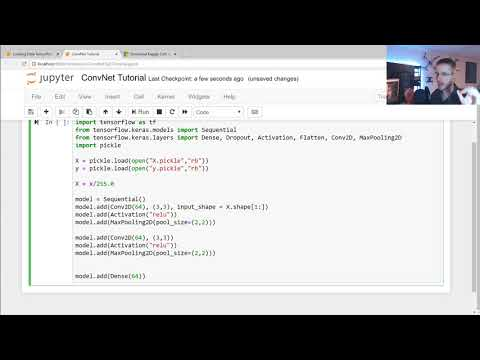

In [2]:
from IPython.display import IFrame, YouTubeVideo
YouTubeVideo('WvoLTXIjBYU',width=600, height=400)

#  Analizando o dataset

In [0]:
#importando as bibliotecas
import tensorflow as tf
import os
from tqdm import tqdm_notebook as tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [9]:
os.listdir('drive/My Drive/dogs-vs-cats-1')

['sampleSubmission.csv',
 'test1.zip',
 'train.zip',
 'test1',
 '.ipynb_checkpoints',
 'train']

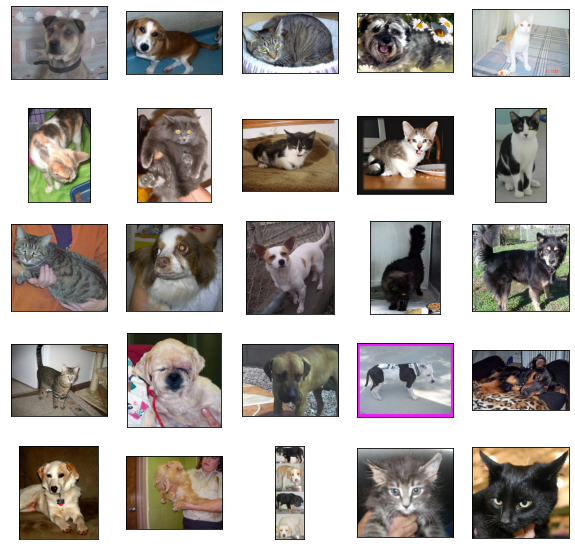

(475, 499, 3)
25000


In [13]:
caminho_data = 'drive/My Drive/dogs-vs-cats-1/train/' # Caminho das imagens de cães e gatos
data_pasta = os.listdir(caminho_data) # Criando uma lista com o nome das imagens
data_pasta = random.sample(data_pasta, len(data_pasta)) # Embaralhar diretorio das imagens
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    img = plt.imread(caminho_data+data_pasta[i]) # Lendo uma imagem do dataset
    plt.imshow(img, cmap=plt.cm.binary)
plt.show()
print(img.shape) # Dimensões da imagem
print(len(data_pasta)) # A quantidate de

# Carregando e pré-processando a base de dados

In [11]:
x_train = [] # Imagens de treinamento
x_test = []  # Imagens de teste
y_train = [] # Labels de treinamento
y_test = [] # Labels de teste
data_pasta = random.sample(data_pasta, len(data_pasta)) # Embaralhar diretorio das imagens
cont_train = 0 # controlar o percetual da qunatidade de imagens de treino e teste
cont_test = 0
img_size = 150
for i in tqdm(data_pasta):
  nome_img = i.split('.')[0] # Pegando o nome da imagem (cat,dog)
  img = cv2.imread(caminho_data+i)
  img = cv2.resize(img,(img_size,img_size))# 
  img = img.astype('float32')/255 #
  
  if cont_train < 4000: # 70% para treino
    if (nome_img == "cat"): # se nome for cat
        x_train.append(img)
        y_train.append(0)
    else: # se nome for dog
        x_train.append(img)
        y_train.append(1)
    cont_train += 1
  
  elif cont_test < 1200: # 30% para teste
      if (nome_img == "cat"): # se nome for cat
        x_test.append(img)
        y_test.append(0)
      else: # se nome for dog
        x_test.append(img)
        y_test.append(1)
      cont_test += 1
  if cont_train == 4000 and cont_test == 1200:  # para a leitura
    break


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


1

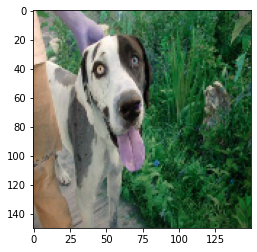

In [23]:
plt.imshow(x_train[1])
y_train[1]

# Criando a arquitetura da CNN

In [0]:
model = tf.keras.models.Sequential() # Definindo um modelo sequencial do Tensorflow
input_shape = (img_size,img_size, 3) # Pegando o formado das imagens para a CNN (150, 150, 1)
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size=3, activation = 'relu', input_shape= input_shape)) # Primeira camada de convolução
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides =2)) # Camada de Pool

model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'relu')) # Segunda camada de convolução
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides =2)) # Camada de Pool

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation = 'relu')) # Terceira camada de convolução
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides =2)) # Camada de Pool

model.add(tf.keras.layers.Conv2D(filters =128, kernel_size=3, activation = 'relu')) # Quarta camada de convolução
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides =2)) # Camada de Pool

# Convolução 2D
* Visualiizar Convoluçã https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [25]:
Image(url= "https://i.pinimg.com/originals/1e/0b/f3/1e0bf3ad7d8ab1f70e42afa07c7c7d0c.gif", width=600, height=450)

# Camada de Pool
  * As redes convolucionais podem incluir camadas de pool locais ou globais para otimizar o cálculo subjacente. As camadas de pool reduzem as dimensões dos dados combinando as saídas de grupos de neurônios em uma camada em um único neurônio na próxima camada. O pool local combina pequenos grupos, normalmente 2 x 2. O pool global atua em todos os neurônios da camada convolucional. Além disso, o pool pode calcular um máximo ou uma média. O pool máximo usa o valor máximo de cada um dos aglomerados de neurônios na camada anterio.

In [26]:
Image(url= "https://miro.medium.com/max/1456/1*WvHC5bKyrHa7Wm3ca-pXtg.gif", width=600, height=350)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

# Camadas de Neurônios
  * Camadas totalmente conectadas conectam todos os neurônios de uma camada a todos os neurônios de outra camada. É, em princípio, o mesmo que a rede neural perceptron tradicional de múltiplas camadas (MLP). A matriz achatada passa por uma camada totalmente conectada para classificar as imagens.

In [0]:
number_class = 2 # Numero de classes
model.add(tf.keras.layers.Flatten()) # Camada de Flattem
model.add(tf.keras.layers.Dense(units=128, activation='relu')) # Primmeira camada de neurônios
model.add(tf.keras.layers.Dropout(0.2)) # Desativando 20% dos neurônios

model.add(tf.keras.layers.Dense(units=128, activation='relu')) # Segunda camada de neurônios
model.add(tf.keras.layers.Dropout(0.2)) # Desativando 20% dos neurônios

model.add(tf.keras.layers.Dense(units=32, activation='relu')) # Terceira camada de neurônios
model.add(tf.keras.layers.Dense(units = number_class, activation = 'sigmoid')) # Terceira camada de neurônios
model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [28]:
Image(url= "https://miro.medium.com/max/3000/1*BIpRgx5FsEMhr1k2EqBKFg.gif", width=600, height=350)

# Arquitetura da CNN

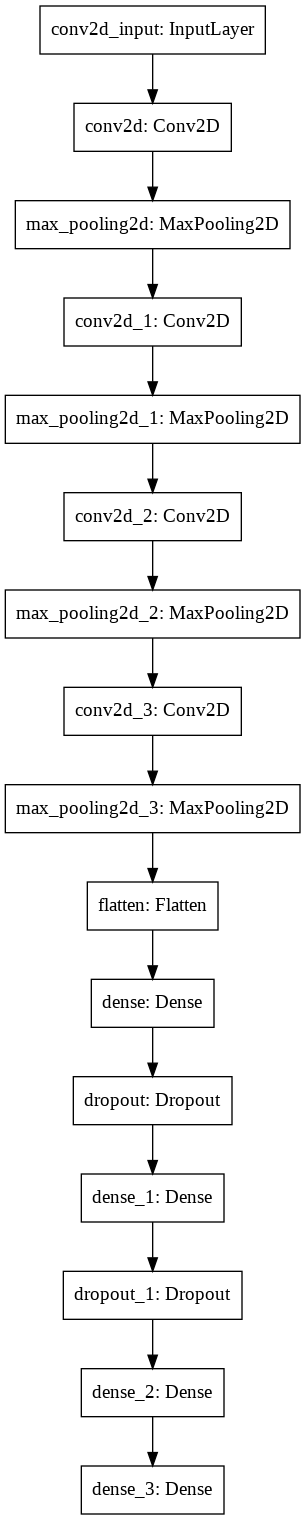

In [37]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

# Formato Tensorflow

In [0]:
x_test = np.array(x_test)
x_train = np.array(x_train)

x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 3) # Formato de entrada da CNN(,sizeImge,sizeImge,channels)
x_train = x_train.reshape(x_train.shape[0], img_size, img_size, 3)#CNN input format (x,sizeImge,sizeImge,channels)

y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = tf.keras.utils.to_categorical(y_train, 2)# CNN input format class
y_test = tf.keras.utils.to_categorical(y_test, 2)# CNN input format class

In [34]:
x_train.shape
y_test[1]

array([1., 0.], dtype=float32)

# Treinando e testando a CNN

In [38]:
history = model.fit(x_train, y_train, epochs=40,  batch_size=70, validation_data=(x_test, y_test))

Epoch 1/40
58/58 [==============================] - 4s 76ms/step - loss: 0.6944 - accuracy: 0.4985 - val_loss: 0.6929 - val_accuracy: 0.4867
Epoch 2/40
58/58 [==============================] - 4s 69ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6928 - val_accuracy: 0.5133
Epoch 3/40
58/58 [==============================] - 4s 68ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6905 - val_accuracy: 0.6200
Epoch 4/40
58/58 [==============================] - 4s 68ms/step - loss: 0.6827 - accuracy: 0.5667 - val_loss: 0.6704 - val_accuracy: 0.5817
Epoch 5/40
58/58 [==============================] - 4s 69ms/step - loss: 0.6579 - accuracy: 0.5990 - val_loss: 0.6533 - val_accuracy: 0.6550
Epoch 6/40
58/58 [==============================] - 4s 68ms/step - loss: 0.6388 - accuracy: 0.6440 - val_loss: 0.5870 - val_accuracy: 0.7050
Epoch 7/40
58/58 [==============================] - 4s 68ms/step - loss: 0.5823 - accuracy: 0.7005 - val_loss: 0.5632 - val_accuracy: 0.7117
Epoch 8/40
58

# Desemenho de treinamneto

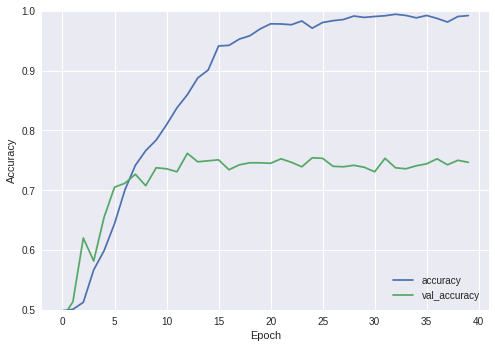

38/38 - 0s - loss: 1.4666 - accuracy: 0.7467


In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.style.use('seaborn') # stilo do  grafico
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
